<a href="https://colab.research.google.com/github/TriDuks/AI/blob/main/Tuan6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install scikit-fuzzy


174.6540637549862


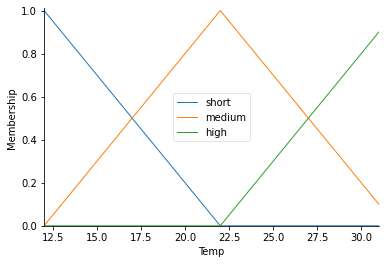

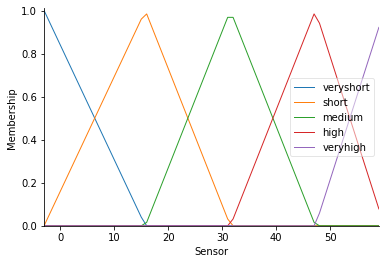

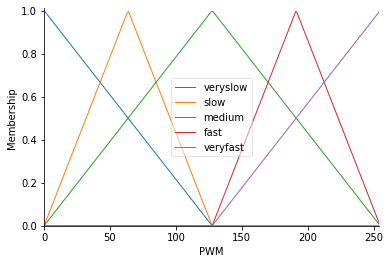

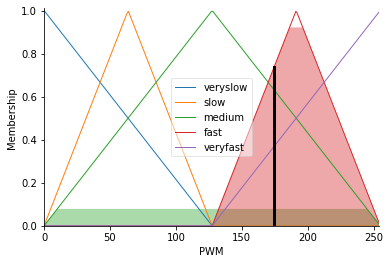

In [17]:
#Điều khiển dộng cơ DC
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt

Temp=ctrl.Antecedent(np.arange(12,32,1),'Temp')
Sensor=ctrl.Antecedent(np.arange(-3,60,1),'Sensor')
PWM=ctrl.Consequent(np.arange(0,255,1),'PWM')

Temp['short']=fuzz.trimf(Temp.universe,[12,12,22])
Temp['medium']=fuzz.trimf(Temp.universe,[12,22,32])
Temp['high']=fuzz.trimf(Temp.universe,[22,32,32])

Sensor['veryshort']=fuzz.trimf(Sensor.universe,[-3,-3,15.75])
Sensor['short']=fuzz.trimf(Sensor.universe,[-3,15.75,31.5])
Sensor['medium']=fuzz.trimf(Sensor.universe,[15.75,31.5,47.25])
Sensor['high']=fuzz.trimf(Sensor.universe,[31.5,47.25,60])
Sensor['veryhigh']=fuzz.trimf(Sensor.universe,[47.25,60,60])

PWM['veryslow']=fuzz.trimf(PWM.universe,[0,0,127.5])
PWM['slow']=fuzz.trimf(PWM.universe,[0,63.75,127.5])
PWM['medium']=fuzz.trimf(PWM.universe,[0,127.5,255])
PWM['fast']=fuzz.trimf(PWM.universe,[127.5,191.25,255])
PWM['veryfast']=fuzz.trimf(PWM.universe,[127.5,255,255])

rule = []

rule1=ctrl.Rule(Temp['short']&Sensor['veryshort'], PWM['veryslow'])
rule2=ctrl.Rule(Temp['short']&Sensor['short'], PWM['veryslow'])
rule3=ctrl.Rule(Temp['short']&Sensor['medium'], PWM['slow'])
rule4=ctrl.Rule(Temp['short']&Sensor['high'], PWM['medium'])
rule5=ctrl.Rule(Temp['short']&Sensor['veryhigh'], PWM['fast'])

rule6=ctrl.Rule(Temp['medium']&Sensor['veryshort'], PWM['veryslow'])
rule7=ctrl.Rule(Temp['medium']&Sensor['short'], PWM['slow'])
rule8=ctrl.Rule(Temp['medium']&Sensor['medium'], PWM['medium'])
rule9=ctrl.Rule(Temp['medium']&Sensor['high'], PWM['fast'])
rule10=ctrl.Rule(Temp['medium']&Sensor['veryhigh'], PWM['veryfast'])

rule11=ctrl.Rule(Temp['high']&Sensor['veryshort'], PWM['slow'])
rule12=ctrl.Rule(Temp['high']&Sensor['short'], PWM['medium'])
rule13=ctrl.Rule(Temp['high']&Sensor['medium'], PWM['fast'])
rule14=ctrl.Rule(Temp['high']&Sensor['high'], PWM['veryfast'])
rule15=ctrl.Rule(Temp['high']&Sensor['veryhigh'], PWM['veryfast'])

Temp.view()
Sensor.view()
PWM.view()
PWMping_ctrl = ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9,rule10,rule11,rule12,rule13,rule14,rule15])
PWMping=ctrl.ControlSystemSimulation(PWMping_ctrl)
PWMping.input['Temp'] = 12
PWMping.input['Sensor']= 60
PWMping.compute()
print(PWMping.output['PWM'])
PWM.view(sim=PWMping)


ValueError: ignored

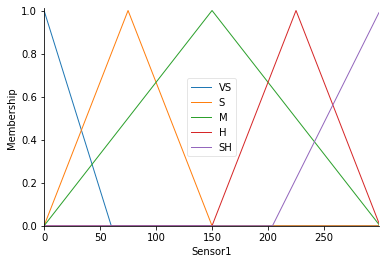

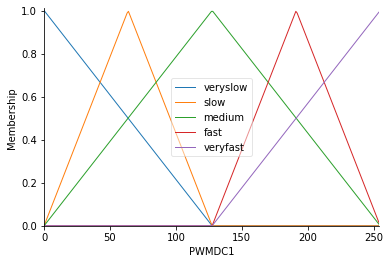

In [40]:
#Điều khiển dộng cơ DC
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt

Sensor1 =ctrl.Antecedent(np.arange(0,300,1),'Sensor1')
Sensor2 =ctrl.Antecedent(np.arange(0,300,1),'Sensor2')
Sensor3 =ctrl.Antecedent(np.arange(0,300,1),'Sensor3')
#Sensor4 =ctrl.Antecedent(np.arange(0,300,1),'Sensor4')
#Sensor5 =ctrl.Antecedent(np.arange(0,300,1),'Sensor5')

PWMDC1=ctrl.Consequent(np.arange(0,255,1),'PWMDC1')
PWMDC2=ctrl.Consequent(np.arange(0,255,1),'PWMDC2')

Sensor1['VS']=fuzz.trimf(Sensor1.universe,[0,0,60])
Sensor1['S']=fuzz.trimf(Sensor1.universe,[0,75,150])
Sensor1['M']=fuzz.trimf(Sensor1.universe,[0,150,300])
Sensor1['H']=fuzz.trimf(Sensor1.universe,[150,225,300])
Sensor1['SH']=fuzz.trimf(Sensor1.universe,[204,300,300])

Sensor2['VS']=fuzz.trimf(Sensor2.universe,[0,0,60])
Sensor2['S']=fuzz.trimf(Sensor2.universe,[0,75,150])
Sensor2['M']=fuzz.trimf(Sensor2.universe,[0,150,300])
Sensor2['H']=fuzz.trimf(Sensor2.universe,[150,225,300])
Sensor2['SH']=fuzz.trimf(Sensor2.universe,[204,300,300])

Sensor3['VS']=fuzz.trimf(Sensor3.universe,[0,0,60])
Sensor3['S']=fuzz.trimf(Sensor3.universe,[0,75,150])
Sensor3['M']=fuzz.trimf(Sensor3.universe,[0,150,300])
Sensor3['H']=fuzz.trimf(Sensor3.universe,[150,225,300])
Sensor3['SH']=fuzz.trimf(Sensor3.universe,[204,300,300])

#Sensor4['VS']=fuzz.trimf(Sensor4.universe,[0,0,60])
#Sensor4['S']=fuzz.trimf(Sensor4.universe,[0,75,150])
#Sensor4['M']=fuzz.trimf(Sensor4.universe,[0,150,300])
#Sensor4['H']=fuzz.trimf(Sensor4.universe,[150,225,300])
#Sensor4['VH']=fuzz.trimf(Sensor4.universe,[204,300,300])

#Sensor5['VS']=fuzz.trimf(Sensor5.universe,[0,0,60])
#Sensor5['S']=fuzz.trimf(Sensor5.universe,[0,75,150])
#Sensor5['M']=fuzz.trimf(Sensor5.universe,[0,150,300])
#Sensor5['H']=fuzz.trimf(Sensor5.universe,[150,225,300])
#Sensor5['VH']=fuzz.trimf(Sensor5.universe,[204,300,300])
Sensor1.view()

PWMDC1['veryslow']=fuzz.trimf(PWMDC1.universe,[0,0,127.5])
PWMDC1['slow']=fuzz.trimf(PWMDC1.universe,[0,63.75,127.5])
PWMDC1['medium']=fuzz.trimf(PWMDC1.universe,[0,127.5,255])
PWMDC1['fast']=fuzz.trimf(PWMDC1.universe,[127.5,191.25,255])
PWMDC1['veryfast']=fuzz.trimf(PWMDC1.universe,[127.5,255,255])

PWMDC2['veryslow']=fuzz.trimf(PWMDC2.universe,[0,0,127.5])
PWMDC2['slow']=fuzz.trimf(PWMDC2.universe,[0,63.75,127.5])
PWMDC2['medium']=fuzz.trimf(PWMDC2.universe,[0,127.5,255])
PWMDC2['fast']=fuzz.trimf(PWMDC2.universe,[127.5,191.25,255])
PWMDC2['veryfast']=fuzz.trimf(PWMDC2.universe,[127.5,255,255])

PWMDC1.view()
rule = []

rule1=ctrl.Rule(Sensor1['veryshort']&Sensor2['short']&Sensor3['short'], PWMDC1['veryslow'])
rule2=ctrl.Rule(Temp['short']&Sensor['short'], PWM['veryslow'])
rule3=ctrl.Rule(Temp['short']&Sensor['medium'], PWM['slow'])
rule4=ctrl.Rule(Temp['short']&Sensor['high'], PWM['medium'])
rule5=ctrl.Rule(Temp['short']&Sensor['veryhigh'], PWM['fast'])

rule6=ctrl.Rule(Temp['medium']&Sensor['veryshort'], PWM['veryslow'])
rule7=ctrl.Rule(Temp['medium']&Sensor['short'], PWM['slow'])
rule8=ctrl.Rule(Temp['medium']&Sensor['medium'], PWM['medium'])
rule9=ctrl.Rule(Temp['medium']&Sensor['high'], PWM['fast'])
rule10=ctrl.Rule(Temp['medium']&Sensor['veryhigh'], PWM['veryfast'])

rule11=ctrl.Rule(Temp['high']&Sensor['veryshort'], PWM['slow'])
rule12=ctrl.Rule(Temp['high']&Sensor['short'], PWM['medium'])
rule13=ctrl.Rule(Temp['high']&Sensor['medium'], PWM['fast'])
rule14=ctrl.Rule(Temp['high']&Sensor['high'], PWM['veryfast'])
rule15=ctrl.Rule(Temp['high']&Sensor['veryhigh'], PWM['veryfast'])


PWMping_ctrl = ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9,rule10,rule11,rule12,rule13,rule14,rule15])
PWMping=ctrl.ControlSystemSimulation(PWMping_ctrl)
PWMping.input['Temp'] = 12
PWMping.input['Sensor']= 60
PWMping.compute()
print(PWMping.output['PWMDC1'])
PWM.view(sim=PWMping)
